In [1]:
import pandas as pd
from scipy import stats # 가설 검정에 활용

# t 검정

### 단일 표본 t 검정

In [2]:
df = pd.read_csv('one_sample.csv')

In [3]:
df.head()

Weight  Income  Age
0      67     811   39
1      94     696   84
2      41     329   74
3      68     423   37
4      87     473   64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  100 non-null    int64
 1   Income  100 non-null    int64
 2   Age     100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB


In [5]:
# One-sample t-test
# 귀무가설: popmean = 65, 양측 검정
stats.ttest_1samp(df['Weight'], popmean=65, alternative='two-sided')

Ttest_1sampResult(statistic=3.6594256346872096, pvalue=0.00040754412377117113)

In [6]:
df['Weight'].mean()

71.03

In [7]:
df['Weight'].std()

16.477995734747093

t-분포를 사용해서 직접 p-value 계산해 보기

In [8]:
from scipy.stats import t

In [9]:
(1-t.cdf(x=3.6594256346872096, df=99))*2

0.0004075441237711974

t 값 직접 계산하기

In [10]:
x_bar = 71.03
mu=65
s = 16.477995734747093
N = 100

In [11]:
t=(x_bar - mu)/(s/100**0.5)

In [12]:
t

3.6594256346872096

### 대응 표본 t 검정

In [13]:
paired_df = pd.read_csv('paired_samples.csv')

In [14]:
paired_df.head()

pretest  posttest
0        5         6
1        4         5
2        3         3
3        2         3
4        1         6

In [19]:
# 대응 표본 t 검정
# 양측 검정
stats.ttest_rel(paired_df['pretest'], paired_df['posttest'], alternative='two-sided')

Ttest_relResult(statistic=-7.137721815393786, pvalue=4.060122206874512e-09)

t 값 직접 계산해 보기

In [20]:
paired_df['diff']=paired_df['posttest']-paired_df['pretest']

In [21]:
paired_df['diff'].mean()

2.26

In [22]:
paired_df['diff'].std()

2.2388955002912687

In [23]:
paired_d = 2.26
paired_s = 2.2388955002912687
N=50

In [24]:
(paired_d-0)/(paired_s/50**0.5)

7.137721815393786

p-value 직접 계산해 보기

In [26]:
from scipy.stats import t

In [29]:
(1-t.cdf(x=7.137721815393786, df=49))*2

4.06012223841401e-09

### 독립 표본 t 검정

In [30]:
inde_df = pd.read_csv('inde_samples.csv')

In [31]:
inde_df.head()

group  brand_attitude
0      1        1.333577
1      1        1.613270
2      1        3.037460
3      1        1.898403
4      1        2.877720

In [32]:
inde_df['group'].value_counts()

1    50
2    50
Name: group, dtype: int64

In [34]:
inde_df[inde_df['group']==1]['brand_attitude']

0     1.333577
1     1.613270
2     3.037460
3     1.898403
4     2.877720
5     3.400307
6     3.035067
7     1.018847
8     2.942648
9     1.557105
10    2.637852
11    1.601650
12    1.763158
13    1.577206
14    3.583419
15    1.497953
16    3.535646
17    3.835576
18    2.772767
19    2.893638
20    3.705767
21    2.882905
22    2.172427
23    1.520467
24    1.806510
25    3.270132
26    1.556714
27    3.786423
28    1.139593
29    3.624118
30    2.647825
31    2.115936
32    3.550802
33    3.882886
34    3.714762
35    3.415941
36    3.883099
37    1.713659
38    2.099567
39    2.530940
40    3.266435
41    2.647778
42    1.127201
43    1.797011
44    3.637521
45    1.866409
46    1.105782
47    3.332391
48    2.956150
49    3.796564
Name: brand_attitude, dtype: float64

In [80]:
stats.ttest_ind(inde_df[inde_df['group']==1]['brand_attitude'], inde_df[inde_df['group']==2]['brand_attitude'])

Ttest_indResult(statistic=-4.450273111442997, pvalue=2.270520365728468e-05)

정규성 가정 검사

<AxesSubplot: >

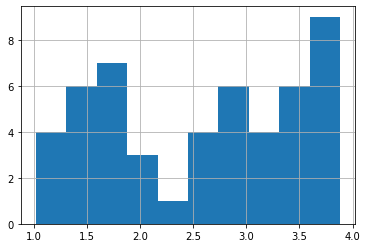

In [81]:
inde_df[inde_df['group']==1]['brand_attitude'].hist()

In [82]:
# Shapiro-Wilks test
stats.shapiro(inde_df[inde_df['group']==1]['brand_attitude'])

ShapiroResult(statistic=0.9195854663848877, pvalue=0.0022780289873480797)

In [89]:
# Mann-Whitney U Test
stats.mannwhitneyu(inde_df[inde_df['group']==1]['brand_attitude'], inde_df[inde_df['group']==2]['brand_attitude'])

MannwhitneyuResult(statistic=678.0, pvalue=8.154342781006206e-05)

In [83]:
# Kruskal-Wallis 순위합 검정
stats.kruskal(inde_df[inde_df['group']==1]['brand_attitude'], inde_df[inde_df['group']==2]['brand_attitude'])

KruskalResult(statistic=15.54933861386138, pvalue=8.037976278442556e-05)

등분산 가정 검사

In [84]:
# Levene's test
stats.levene(inde_df[inde_df['group']==1]['brand_attitude'], inde_df[inde_df['group']==2]['brand_attitude'])

LeveneResult(statistic=0.2545078641285799, pvalue=0.6150511328928017)

In [86]:
# Bartlett's test
stats.bartlett(inde_df[inde_df['group']==1]['brand_attitude'], inde_df[inde_df['group']==2]['brand_attitude'])

BartlettResult(statistic=0.47011388882269456, pvalue=0.49293477903186733)

In [88]:
# Conduct Welch's t-Test and print the result
stats.ttest_ind(inde_df[inde_df['group']==1]['brand_attitude'], inde_df[inde_df['group']==2]['brand_attitude'], equal_var = False)

Ttest_indResult(statistic=-4.450273111442997, pvalue=2.289491638200335e-05)

In [41]:
inde_df.groupby('group')['brand_attitude'].mean()

group
1    2.579340
2    3.439695
Name: brand_attitude, dtype: float64

# 분산 분석 (ANOVA, Analysis of Variance)

### 일원분산분석 (One-way ANOVA)

In [42]:
anova_df = pd.read_csv('one_way_ANOVA.csv')

In [43]:
anova_df.head()

Ad_exposure  Brand_attitudes
0            1              4.0
1            1              4.0
2            1              3.0
3            1              2.0
4            1              3.0

In [44]:
group1 = anova_df[anova_df['Ad_exposure']==1]
group2 = anova_df[anova_df['Ad_exposure']==2]
group3 = anova_df[anova_df['Ad_exposure']==3]

In [45]:
group1

Ad_exposure  Brand_attitudes
0             1              4.0
1             1              4.0
2             1              3.0
3             1              2.0
4             1              3.0
5             1              3.4
6             1              3.5
7             1              4.0
8             1              3.0
9             1              3.0
30            1              2.0

In [46]:
anova_df.groupby('Ad_exposure')['Brand_attitudes'].mean()

Ad_exposure
1    3.172727
2    3.636364
3    3.909091
Name: Brand_attitudes, dtype: float64

In [47]:
from scipy.stats import f_oneway

In [49]:
# 일원분산분석 수행
f_oneway(group1['Brand_attitudes'],group2['Brand_attitudes'],group3['Brand_attitudes'])

F_onewayResult(statistic=3.6482958665699767, pvalue=0.038175226469524814)

정규성 검사

In [90]:
stats.shapiro(group1['Brand_attitudes'])

ShapiroResult(statistic=0.8749304413795471, pvalue=0.08966606855392456)

In [91]:
stats.kruskal(group1['Brand_attitudes'],group2['Brand_attitudes'],group3['Brand_attitudes'])

KruskalResult(statistic=5.3756931773460535, pvalue=0.06802727245660364)

등분산 검사

In [92]:
stats.bartlett(group1['Brand_attitudes'],group2['Brand_attitudes'],group3['Brand_attitudes'])

BartlettResult(statistic=1.330818046208691, pvalue=0.514063220964937)

In [93]:
# 위반시 
# Welch's ANOVA 사용
!pip install pingouin

     -------------------------------------- 198.6/198.6 KB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7034 sha256=0c9efb08e01a2405d472d2189d88a69a116425f50d0b2cd3c5f8e712ef7cc592
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6a\33\c4\0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils


You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [94]:
import pingouin as pg

In [95]:
pg.welch_anova(dv='Brand_attitudes', between='Ad_exposure', data=anova_df)

Source  ddof1      ddof2         F     p-unc       np2
0  Ad_exposure      2  19.426867  2.969649  0.074934  0.195637

# 상관관계 분석

In [50]:
corr_df = pd.read_csv('correlation.csv')

In [51]:
corr_df

Test_scores   IQ
0            65  111
1            52  111
2            50  105
3            58  109
4            62  101
5            51  115
6            51  119
7            50  117
8            60  102
9            50  120
10           50  115
11           57  115
12           62  120
13           62  127
14           66  120
15           63  112
16           60  120
17           77  126
18           77  125
19           63  115
20           66  137
21           84  129
22           75  139
23           64  130
24           66  134
25           69  139
26           92  130
27           97  127
28           80  130
29           77  131

In [52]:
from scipy.stats import pearsonr

In [53]:
pearsonr(corr_df['Test_scores'],corr_df['IQ'])

PearsonRResult(statistic=0.5697635911821942, pvalue=0.0010140101211348976)

# 카이 제곱 검정

In [54]:
chi_df = pd.read_csv('chi_square.csv')

In [55]:
chi_df.head()
# Gender: 0 => 여성, 1 => 남성
# Political_preference: 1 => 보수, 2 => 진보

Gender  Political_preference
0       1                     2
1       0                     2
2       1                     1
3       0                     2
4       1                     2

In [57]:
xtab = pd.crosstab(chi_df['Gender'],chi_df['Political_preference'])

In [58]:
xtab

Political_preference   1   2
Gender                      
0                     11  15
1                     14  10

In [66]:
from scipy.stats import chi2_contingency

In [67]:
res = chi2_contingency(xtab)

In [69]:
res

(0.7211538461538461,
 0.39576568734555595,
 1,
 array([[13., 13.],
        [12., 12.]]))

In [70]:
res[0] # Chi-square statistic

0.7211538461538461

In [71]:
res[1] # p-value

0.39576568734555595

In [72]:
res[2] # degree of freedom

1

In [73]:
res[3] # expected values

array([[13., 13.],
       [12., 12.]])